In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def evaluate_preds(true_values_train, pred_values_train, true_values_test, pred_values_test):
    print('Train:\t' + 'R2 = ' + str(round(r2_score(true_values_train, pred_values_train), 3)) + 
          '\tMAE = ' + str(int(mean_absolute_error(true_values_train, pred_values_train))) +
          '\n' +
          'Test:\t' + 'R2 = ' + str(round(r2_score(true_values_test, pred_values_test), 3)) +
          '\tMAE = ' + str(int(mean_absolute_error(true_values_test, pred_values_test)))
         )
    
    plt.figure(figsize=(16, 6))
       
    plt.subplot(121)
    sns.scatterplot(x=pred_values_train, y=true_values_train)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train: True vs Predicted values');
    
    plt.subplot(122)
    sns.scatterplot(x=pred_values_test, y=true_values_test)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test: True vs Predicted values');

In [3]:
train = pd.read_csv('data_housing_model/train_housing_prepared')
test = pd.read_csv('data_housing_model/test_housing_prepared')
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

In [8]:
y = pd.read_csv('data_housing_model/housing_y')
y.drop('Id', axis=1, inplace=True)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(train, y, 
                                                    test_size=0.25, 
                                                    shuffle=True, 
                                                    random_state=42)

In [10]:
max_depth_values = np.arange(2, 20)

accuracy_on_test = []
accuracy_on_train = []

for i, value in enumerate(max_depth_values):
    clf = DecisionTreeRegressor(max_depth=value)
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
        
    acc_test = r2_score(y_test, y_pred)
    acc_train = r2_score(y_train, y_pred_train)
    
    if i % 4 == 2:
        print('K = {}'.format(value))
        print('\tacc_valid = {}'.format(acc_test))
        print('\tacc_train = {}\n'.format(acc_train))
    
    accuracy_on_test.append(acc_test)
    accuracy_on_train.append(acc_train)

K = 4
	acc_valid = 0.548815469989459
	acc_train = 0.57958414100839

K = 8
	acc_valid = 0.6341572401915512
	acc_train = 0.7552750555558909

K = 12
	acc_valid = 0.5825184676929346
	acc_train = 0.8748849149601525

K = 16
	acc_valid = 0.5199023361934287
	acc_train = 0.9618075016525792



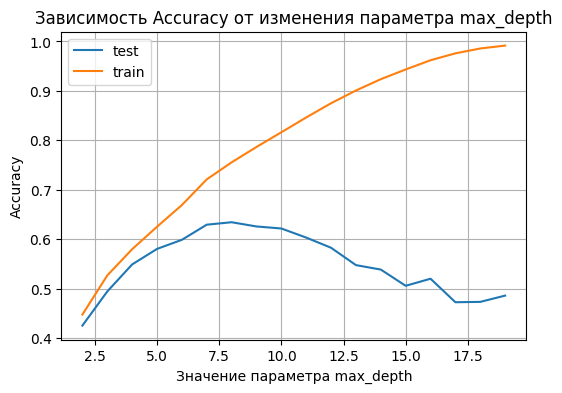

In [11]:
plt.rcParams['figure.figsize'] = 6, 4

plt.plot(max_depth_values, accuracy_on_test, label="test")
plt.plot(max_depth_values, accuracy_on_train, label="train")

plt.xlabel('Значение параметра max_depth')
plt.ylabel('Accuracy')
plt.title('Зависимость Accuracy от изменения параметра max_depth')

plt.legend()
plt.grid()

plt.show()

In [12]:
clf = DecisionTreeRegressor(max_depth=8)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

r2_score(y_test, y_pred)

0.6396939414001465

Train:	R2 = 0.755	MAE = 29664
Test:	R2 = 0.64	MAE = 34883


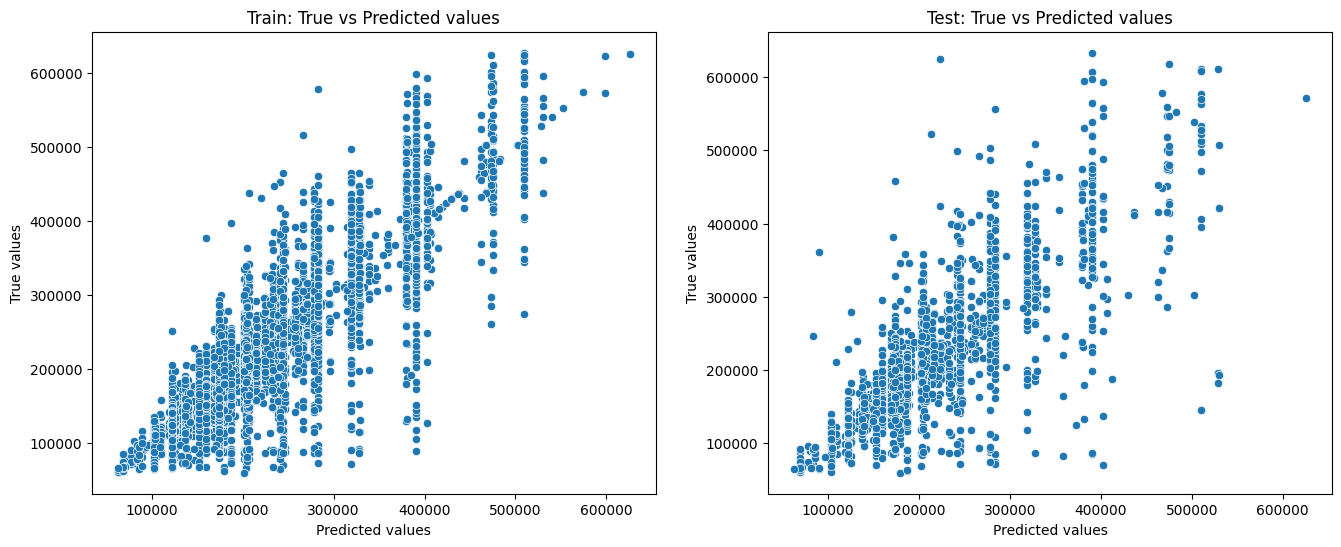

In [13]:
y_train_preds = clf.predict(X_train)
y_test_preds = clf.predict(X_test)

evaluate_preds(pd.Series(y_train['Price']), y_train_preds.flatten(), pd.Series(y_test['Price']), y_test_preds.flatten())

In [14]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)

scores = cross_val_score(clf, train, y['Price'], cv=cv, scoring='r2', n_jobs=-1)
print('R2 для дерева решений = ', round(scores.mean(), 4))

R2 для дерева решений =  0.6363
